In [44]:
import mlrose_hiive as mlrose
import numpy as np
import time
import itertools
import operator as op
from functools import reduce
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


In [33]:
random_state = 2020
max_attempts = 50
max_iters = 1000
N = 10
init_states = [np.random.permutation(8) for x in range(N)]

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def queens_max(state):

    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1
    return fitness_cnt

fitness_cust = mlrose.CustomFitness(queens_max)
print(f'optimal fitness is {ncr(8,2)}')

optimal fitness is 28.0


### Random hill climbing

In [116]:
optimal_fitness_list = []
avg_fitness_evals_list = []
average_time_taken_list = []
params_list = []
for restarts in [10, 50, 100]:
    start_time = time.time()
    best_states = []
    best_fitnesses = []
    curves = []
    for idx, init_state in enumerate(init_states):

        problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize=True, max_val=8)
        best_state, best_fitness, curve = mlrose.random_hill_climb(problem, max_attempts = max_attempts, max_iters = max_iters, restarts = restarts,
                                                                   init_state = init_state, curve = True, random_state = random_state + idx)
        best_states.append(best_state)
        best_fitnesses.append(best_fitness)
        curves.append(curve)

    end_time = time.time()
    total_time = round(end_time - start_time, 5)
    
    average_time_taken = round(total_time / N, 5)
    average_best_fitness = np.mean(best_fitnesses)
    avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N)
    
    params_list.append(f'restarts={restarts}')
    avg_fitness_evals_list.append(avg_fitness_evals)
    optimal_fitness_list.append(average_best_fitness)
    average_time_taken_list.append(average_time_taken)
    
    print(f'------- restarts = {restarts}, total_time = {total_time} -------')
#     print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#     print(f'The average fitness at the best state is {average_best_fitness}')
#     print('\n')
    
rhc_dict = {'params': params_list,
            'fitness_eval': avg_fitness_evals_list,
            'best_fitness': optimal_fitness_list,
            'average_time_taken': average_time_taken_list}

------- restarts = 10, total_time = 0.50968 -------
------- restarts = 50, total_time = 2.4055 -------
------- restarts = 100, total_time = 4.68631 -------


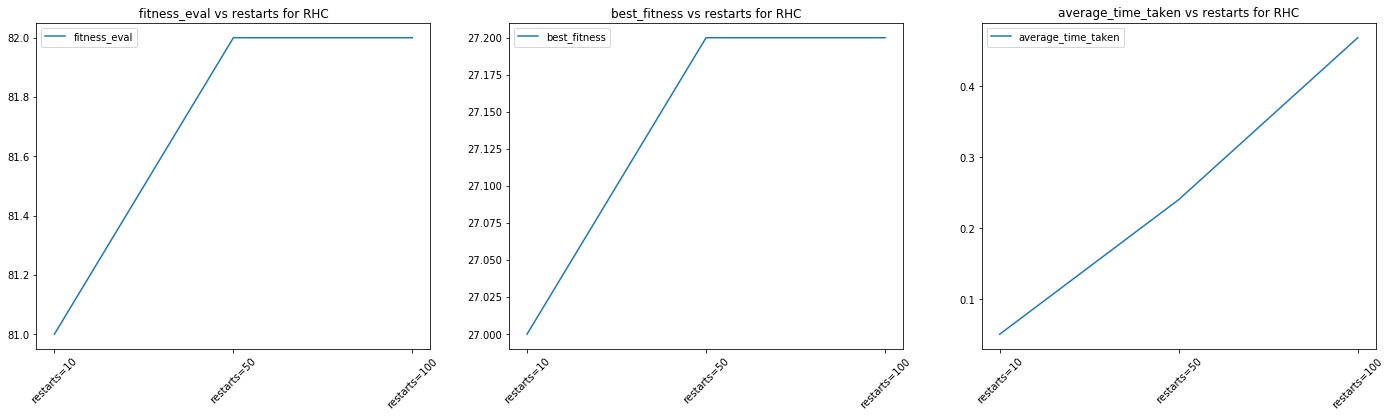

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = rhc_dict.copy()
temp_dict.pop('params')
for ax, (key, val) in zip(axes.ravel(), temp_dict.items()):
    if key == 'params':
        continue
    ax.set_title(f"{key} vs restarts for RHC")
    ax.plot(rhc_dict['params'], val, label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
plt.show()

### Simulated annealing

In [81]:
optimal_fitness_list = []
avg_fitness_evals_list = []
params_list = []
average_time_taken_list = []
for exp_const in [0.001, 0.005, 0.01]:
    for init_temp in [0.1, 0.5, 1.0]:
        start_time = time.time()
        best_states = []
        best_fitnesses = []
        curves = []
        for idx, init_state in enumerate(init_states):
            schedule = mlrose.ExpDecay(init_temp = init_temp, exp_const = exp_const)
            problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize=True, max_val=8)
            best_state, best_fitness, curve = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = max_attempts, 
                                                                         max_iters = max_iters, init_state = init_state, curve = True,
                                                                         random_state = random_state + idx)
            best_states.append(best_state)
            best_fitnesses.append(best_fitness)
            curves.append(curve)
        
        end_time = time.time()
        total_time = round(end_time - start_time, 5)
        
        average_time_taken = round(total_time / N, 5)
        average_best_fitness = np.mean(best_fitnesses)
        avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N)

        params_list.append(f'exp_const={exp_const}_init_temp={init_temp}')
        avg_fitness_evals_list.append(avg_fitness_evals)
        optimal_fitness_list.append(average_best_fitness)
        average_time_taken_list.append(average_time_taken)
    
        print(f'------- exp_const = {exp_const}, init_temp = {init_temp}, total_time = {total_time} -------')
#         print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#         print(f'The average fitness at the best state is {average_best_fitness}')
#         print('\n')
        
sa_dict = {'params': params_list,
           'fitness_eval': avg_fitness_evals_list,
           'best_fitness': optimal_fitness_list,
           'average_time_taken': average_time_taken_list}

------- exp_const = 0.001, init_temp = 0.1, total_time = 0.19006 -------
------- exp_const = 0.001, init_temp = 0.5, total_time = 0.47437 -------
------- exp_const = 0.001, init_temp = 1.0, total_time = 0.76053 -------
------- exp_const = 0.005, init_temp = 0.1, total_time = 0.15986 -------
------- exp_const = 0.005, init_temp = 0.5, total_time = 0.22455 -------
------- exp_const = 0.005, init_temp = 1.0, total_time = 0.30809 -------
------- exp_const = 0.01, init_temp = 0.1, total_time = 0.16826 -------
------- exp_const = 0.01, init_temp = 0.5, total_time = 0.1781 -------
------- exp_const = 0.01, init_temp = 1.0, total_time = 0.26754 -------


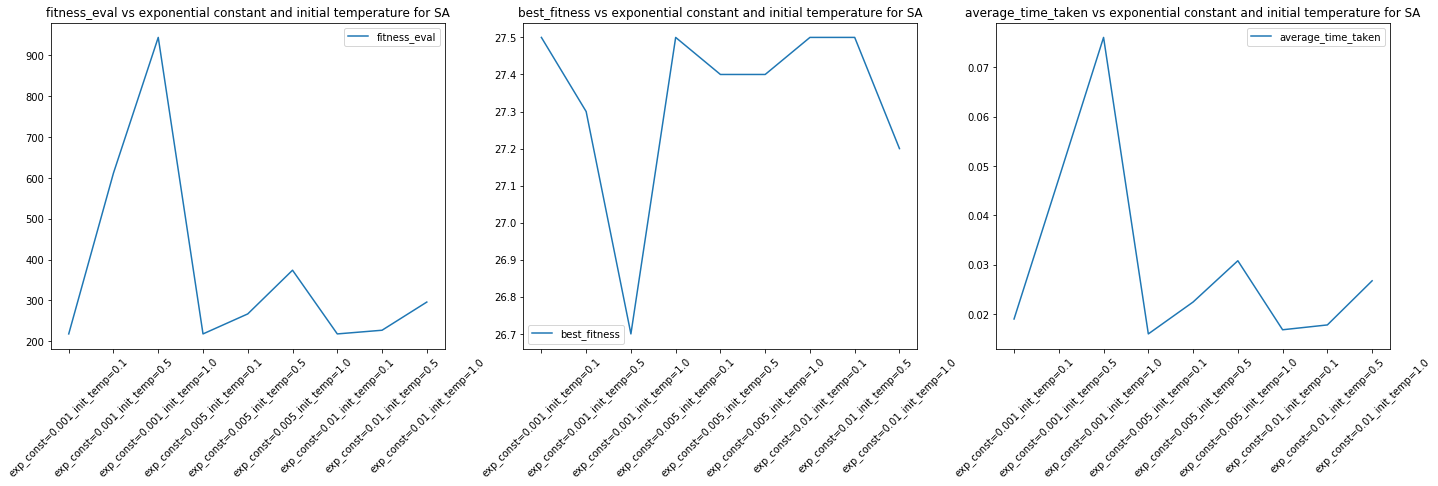

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = sa_dict.copy()
temp_dict.pop('params')
for ax, (key, val) in zip(axes.ravel(), temp_dict.items()):
    if key == 'params':
        continue
    ax.set_title(f"{key} vs exponential constant and initial temperature for SA")
    ax.plot(sa_dict['params'], val, label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
    
plt.show()

### Genetic Algorithm

In [83]:
optimal_fitness_list = []
avg_fitness_evals_list = []
params_list = []
average_time_taken_list = []
for pop_size in [50, 100, 200]:
    for mutation_prob in [0.2, 0.4, 0.6, 0.8]:
        start_time = time.time()
        best_states = []
        best_fitnesses = []
        curves = []
        for idx, init_state in enumerate(init_states):
            problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize=True, max_val=8)
            best_state, best_fitness, curve = mlrose.genetic_alg(problem, pop_size = pop_size, mutation_prob = mutation_prob,
                                                                 max_attempts = max_attempts, max_iters = max_iters,
                                                                 curve=True, random_state = random_state + idx)
            best_states.append(best_state)
            best_fitnesses.append(best_fitness)
            curves.append(curve)

        end_time = time.time()
        total_time = round(end_time - start_time, 5)
        average_time_taken = round(total_time / N, 5)
        average_best_fitness = np.mean(best_fitnesses)
        avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N) * pop_size
        params_list.append(f'pop_size={pop_size}_mutation_prob={mutation_prob}')
        
        
        avg_fitness_evals_list.append(avg_fitness_evals)
        optimal_fitness_list.append(average_best_fitness)
        average_time_taken_list.append(average_time_taken)
        
        print(f'----- pop_size = {pop_size}, mutation_prob = {mutation_prob}, total_time = {total_time} ------')
#         print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#         print(f'The average fitness at the best state is {average_best_fitness}')
#         print('\n')
        
ga_dict = {'params': params_list,
           'fitness_eval': avg_fitness_evals_list,
           'best_fitness': optimal_fitness_list,
           'average_time_taken': average_time_taken_list}

----- pop_size = 50, mutation_prob = 0.2, total_time = 4.31646 ------
----- pop_size = 50, mutation_prob = 0.4, total_time = 3.88211 ------
----- pop_size = 50, mutation_prob = 0.6, total_time = 3.51481 ------
----- pop_size = 50, mutation_prob = 0.8, total_time = 3.40314 ------
----- pop_size = 100, mutation_prob = 0.2, total_time = 8.5997 ------
----- pop_size = 100, mutation_prob = 0.4, total_time = 9.66141 ------
----- pop_size = 100, mutation_prob = 0.6, total_time = 8.30938 ------
----- pop_size = 100, mutation_prob = 0.8, total_time = 6.87887 ------
----- pop_size = 200, mutation_prob = 0.2, total_time = 17.16601 ------
----- pop_size = 200, mutation_prob = 0.4, total_time = 16.65329 ------
----- pop_size = 200, mutation_prob = 0.6, total_time = 14.40185 ------
----- pop_size = 200, mutation_prob = 0.8, total_time = 12.70427 ------


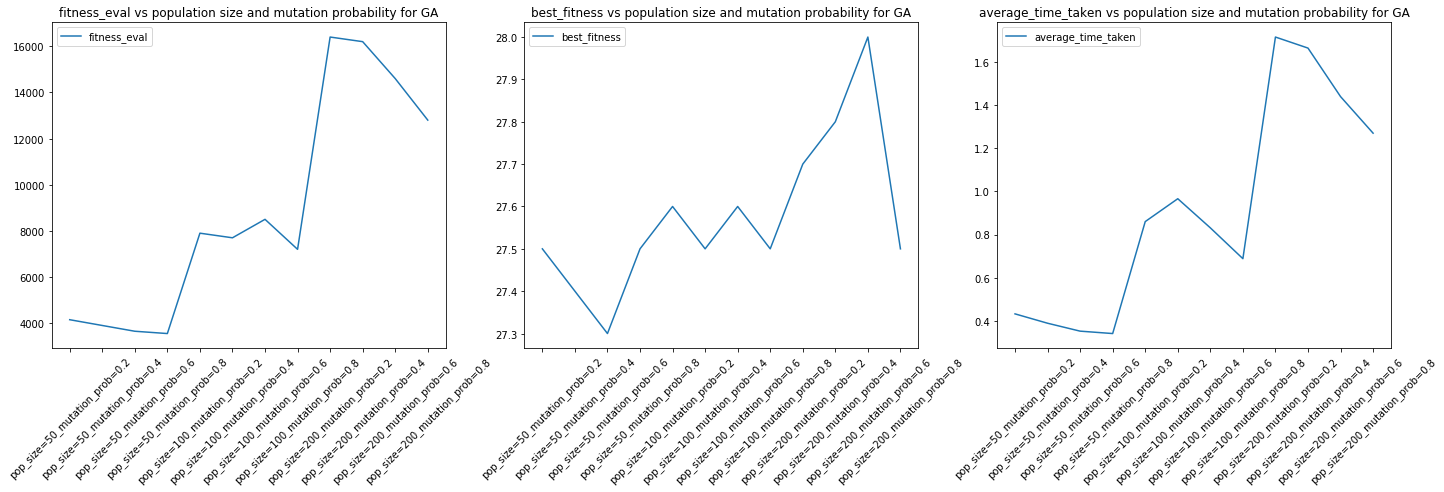

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = ga_dict.copy()
temp_dict.pop('params')
for ax, (key, val) in zip(axes.ravel(), temp_dict.items()):
    if key == 'params':
        continue
    ax.set_title(f"{key} vs population size and mutation probability for GA")
    ax.plot(ga_dict['params'], val, label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
    
plt.show()

### Mimic

In [85]:
optimal_fitness_list = []
avg_fitness_evals_list = []
params_list = []
average_time_taken_list = []
for pop_size in [50, 100, 200]:
    for keep_pct in [0.01, 0.05, 0.1, 0.5]:
        start_time = time.time()
        best_states = []
        best_fitnesses = []
        curves = []
        for idx, init_state in enumerate(init_states):
            problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize=True, max_val=8)
            best_state, best_fitness, curve = mlrose.mimic(problem, pop_size=pop_size, keep_pct = keep_pct, max_attempts = max_attempts, max_iters = max_iters,
                                                           curve=True, random_state = random_state + idx)
            best_states.append(best_state)
            best_fitnesses.append(best_fitness)
            curves.append(curve)

        end_time = time.time()
        total_time = round(end_time - start_time, 5)
        average_time_taken = round(total_time / N, 5)
        average_best_fitness = np.mean(best_fitnesses)
        avg_fitness_evals = int(len(list(itertools.chain(*curves))) / N) * pop_size
        
        params_list.append(f'pop_size={pop_size}_keep_pct={keep_pct}')
        avg_fitness_evals_list.append(avg_fitness_evals)
        optimal_fitness_list.append(average_best_fitness)
        average_time_taken_list.append(average_time_taken)
        
        print(f'----- pop_size = {pop_size}, keep_pct = {keep_pct}, total_time = {total_time} ------')
#         print(f'The average time taken for one run to reach the best state is {average_time_taken} seconds')
#         print(f'The average fitness at the best state is {average_best_fitness}')
#         print('\n')
    
mm_dict = {'params': params_list,
           'fitness_eval': avg_fitness_evals_list,
           'best_fitness': optimal_fitness_list,
           'average_time_taken': average_time_taken_list}

----- pop_size = 50, keep_pct = 0.01, total_time = 13.89745 ------
----- pop_size = 50, keep_pct = 0.05, total_time = 13.92434 ------
----- pop_size = 50, keep_pct = 0.1, total_time = 14.71086 ------
----- pop_size = 50, keep_pct = 0.5, total_time = 14.64431 ------
----- pop_size = 100, keep_pct = 0.01, total_time = 14.93947 ------
----- pop_size = 100, keep_pct = 0.05, total_time = 14.97111 ------
----- pop_size = 100, keep_pct = 0.1, total_time = 15.32966 ------
----- pop_size = 100, keep_pct = 0.5, total_time = 16.57414 ------
----- pop_size = 200, keep_pct = 0.01, total_time = 17.3202 ------
----- pop_size = 200, keep_pct = 0.05, total_time = 17.5223 ------
----- pop_size = 200, keep_pct = 0.1, total_time = 18.0878 ------
----- pop_size = 200, keep_pct = 0.5, total_time = 18.97281 ------


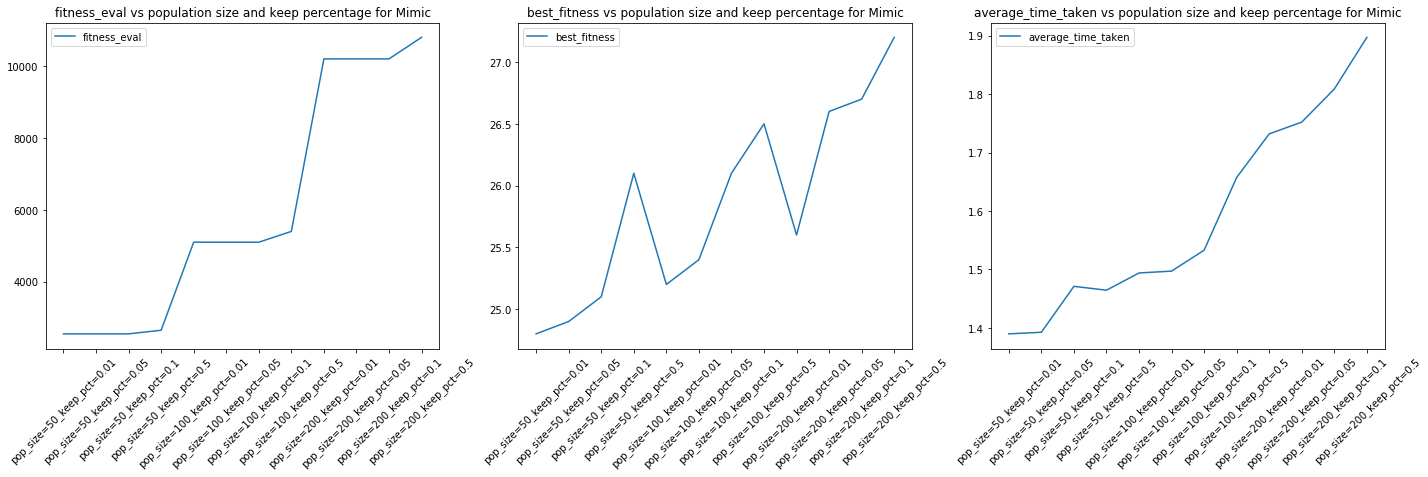

In [126]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
temp_dict = mm_dict.copy()
temp_dict.pop('params')
for ax, (key, val) in zip(axes.ravel(), temp_dict.items()):
    if key == 'params':
        continue
    ax.set_title(f"{key} vs population size and keep percentage for Mimic")
    ax.plot(mm_dict['params'], val, label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
    
plt.show()

### Comparison

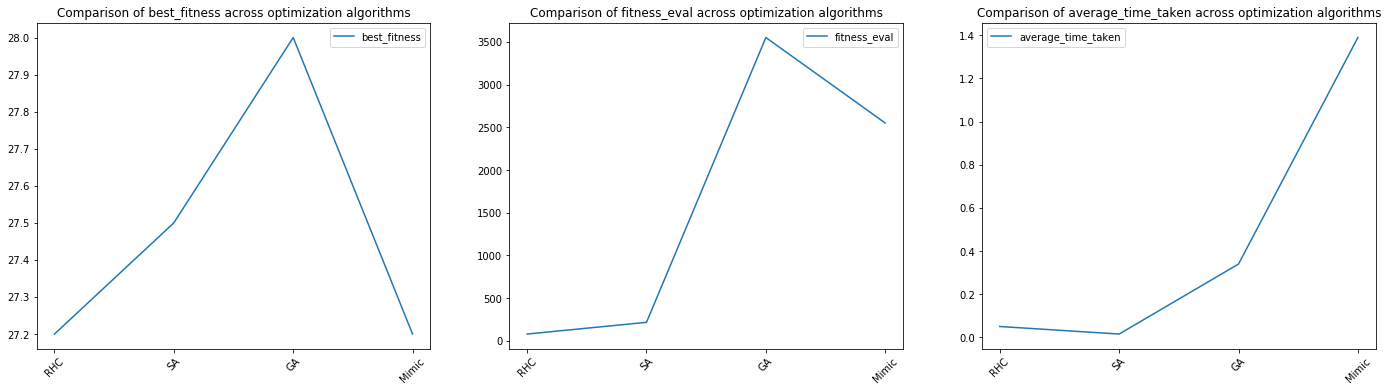

In [128]:
algorithms = ['RHC', 'SA', 'GA', 'Mimic']
algo_dict_list = [rhc_dict, sa_dict, ga_dict, mm_dict]
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for ax, key in zip(axes.ravel(), ['best_fitness', 'fitness_eval', 'average_time_taken']):

    ax.set_title(f"Comparison of {key} across optimization algorithms")
    if key == 'best_fitness':
        optimal_metrics = [np.max(np.array(algo_dict[key])) for algo_dict in algo_dict_list]
    else:
        optimal_metrics = [np.min(np.array(algo_dict[key])) for algo_dict in algo_dict_list]
    ax.plot(algorithms, optimal_metrics, label=key)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(loc=0)
plt.show()